In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


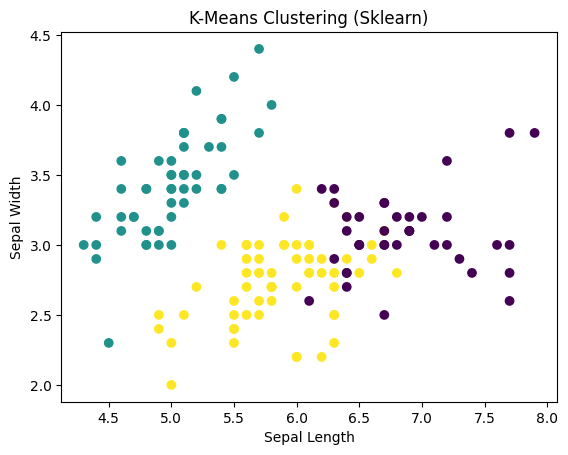

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Cluster labels
labels = kmeans.labels_

# Plot (only 2 features for visualization)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering (Sklearn)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


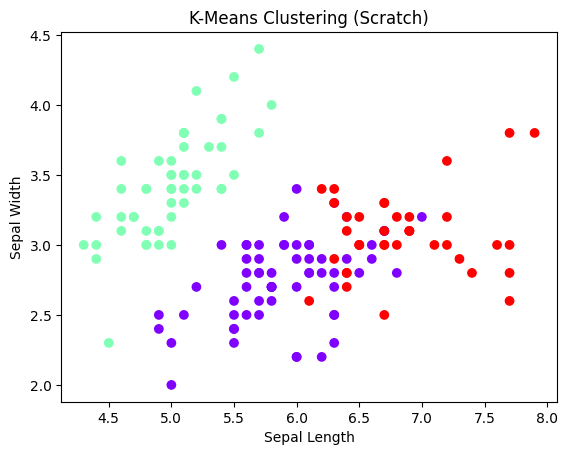

In [3]:
import numpy as np

def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans_scratch(X, k=3, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iters):
        # Assign clusters
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        
        # Update centroids
        new_centroids = []
        for cluster in clusters:
            new_centroids.append(np.mean(cluster, axis=0))
        new_centroids = np.array(new_centroids)
        
        # Convergence check
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    # Assign final labels
    labels = []
    for point in X:
        distances = [euclidean(point, centroid) for centroid in centroids]
        labels.append(np.argmin(distances))

    return np.array(labels), centroids

# Run custom K-Means
X_np = X.values
labels_scratch, centroids_scratch = kmeans_scratch(X_np, k=3)

# Visualize
plt.scatter(X_np[:, 0], X_np[:, 1], c=labels_scratch, cmap='rainbow')
plt.title("K-Means Clustering (Scratch)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
